## Variational AutoEncoders

__Assignment Goals__:

- Implementing Fully Connected AutoEncoders
- Implementing Convolutional AutoEncoders
- Understand Variational Autoncoder intuition


__DataSet:__ MNIST handwritten digit dataset

In [166]:
%tensorflow_version 1.x
import tensorflow as tf
import numpy as np
from matplotlib import pyplot as plt

TensorFlow is already loaded. Please restart the runtime to change versions.


In [167]:
(x_train, _), (x_test, _) = tf.keras.datasets.mnist.load_data()
print(np.shape(x_train),np.shape(x_test))

(60000, 28, 28) (10000, 28, 28)


**Fully connected autoencoder**

In [35]:
# Reshaping the inputs

train_input = np.reshape(x_train, (-1,784))
test_input = np.reshape(x_test, (-1,784))
print(np.shape(train_input),np.shape(test_input))

(60000, 784) (10000, 784)


In [0]:
# Normalizing the inputs

train_input = train_input/255
test_input = test_input/255

In [37]:
# Model

input_layer = tf.keras.layers.Input(shape=(784,), name='input')
encoding_layer0 = tf.keras.layers.Dense(300, activation='relu', name='enc0')(input_layer)
encoding_layer1 = tf.keras.layers.Dense(75, activation='relu', name='enc1')(encoding_layer0)
encoding_layer2 = tf.keras.layers.Dense(15, activation='relu', name='enc2')(encoding_layer1)
bottleneck = tf.keras.layers.Dense(2, activation='relu', name='bottleneck')(encoding_layer2)
decoding_layer1 = tf.keras.layers.Dense(15, activation='relu', name='dec1')(bottleneck)
decoding_layer2 = tf.keras.layers.Dense(75, activation='relu', name='dec2')(decoding_layer1)
decoding_layer3 = tf.keras.layers.Dense(300, activation='relu', name='dec3')(decoding_layer2)
output_layer = tf.keras.layers.Dense(784, activation='sigmoid', name='output')(decoding_layer3)
fcae_model = tf.keras.Model(inputs=input_layer, outputs=output_layer)

fcae_model.compile(loss='mse',optimizer='adam')
print(fcae_model.summary())

Model: "model_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           [(None, 784)]             0         
_________________________________________________________________
enc0 (Dense)                 (None, 300)               235500    
_________________________________________________________________
enc1 (Dense)                 (None, 75)                22575     
_________________________________________________________________
enc2 (Dense)                 (None, 15)                1140      
_________________________________________________________________
bottleneck (Dense)           (None, 2)                 32        
_________________________________________________________________
dec1 (Dense)                 (None, 15)                45        
_________________________________________________________________
dec2 (Dense)                 (None, 75)                120

In [38]:
q1 = fcae_model.fit(train_input, train_input, batch_size=500, epochs=100, validation_data=(test_input,test_input)) 
# Data shuffle is TRUE by default

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 1s 22us/sample - loss: 0.0870 - val_loss: 0.0686
Epoch 2/100
60000/60000 [==============================] - 1s 15us/sample - loss: 0.0649 - val_loss: 0.0635
Epoch 3/100
60000/60000 [==============================] - 1s 15us/sample - loss: 0.0623 - val_loss: 0.0612
Epoch 4/100
60000/60000 [==============================] - 1s 15us/sample - loss: 0.0606 - val_loss: 0.0601
Epoch 5/100
60000/60000 [==============================] - 1s 15us/sample - loss: 0.0596 - val_loss: 0.0588
Epoch 6/100
60000/60000 [==============================] - 1s 14us/sample - loss: 0.0582 - val_loss: 0.0577
Epoch 7/100
60000/60000 [==============================] - 1s 15us/sample - loss: 0.0570 - val_loss: 0.0563
Epoch 8/100
60000/60000 [==============================] - 1s 15us/sample - loss: 0.0557 - val_loss: 0.0549
Epoch 9/100
60000/60000 [==============================] - 1s 15us/sample - loss: 0.05

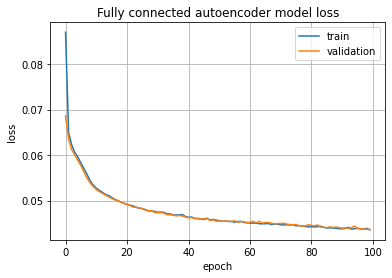

In [39]:
# Loss plots 

from matplotlib import pyplot as plt

plt.plot(q1.history['loss'])
plt.plot(q1.history['val_loss'])
plt.title('Fully connected autoencoder model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.grid()
plt.show()

In [0]:
# Randomly choosing 10 test images
np.random.seed(3)
rand_index = np.random.randint(10000, size=10)
final_test_images = test_input[rand_index]


# Getting the intermediate layer output (bottleneck layer encoded)
encoding_model = tf.keras.Model(fcae_model.input, fcae_model.get_layer('bottleneck').output)
final_test_image_encoding = encoding_model.predict(final_test_images)


# Getting the autoencoder output (decoded)
decoded_output = fcae_model.predict(final_test_images)

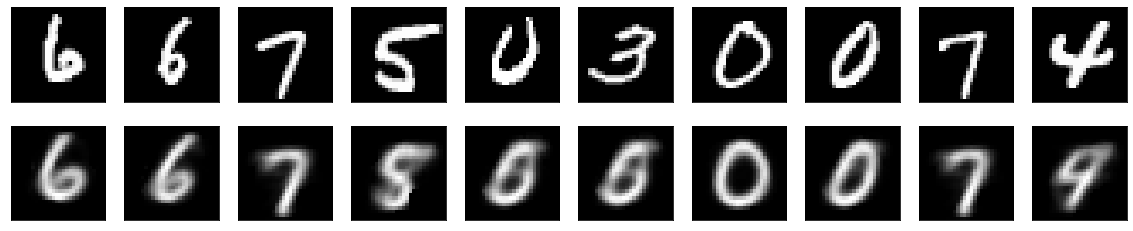

Top row images are original; Bottom row images are the reconstructed ones


In [48]:
# Visualizing the decoded images (Code borrowed from https://blog.keras.io/building-autoencoders-in-keras.html)

n = 10  
plt.figure(figsize=(20, 4))

for i in range(n):

    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(final_test_images[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_output[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

print('Top row images are original; Bottom row images are the reconstructed ones')

**Convolutional Autoencoder**





In [49]:
# Preparing the inputs

train_input = np.expand_dims(x_train, -1)
test_input = np.expand_dims(x_test, -1)

# Normalize the inputs
train_input = train_input/255
test_input = test_input/255

print(np.shape(train_input),np.shape(test_input))

(60000, 28, 28, 1) (10000, 28, 28, 1)


In [50]:
# np.random.seed(10)

input_layer2 = tf.keras.layers.Input(shape=(28, 28, 1), name='input')  
e1 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='valid', name='e1')(input_layer2)
e2 = tf.keras.layers.MaxPooling2D((2, 2), padding='same', name='e2')(e1)
e3 = tf.keras.layers.Conv2D(8, (3, 3), activation='relu', padding='valid', name='e3')(e2)
e4 = tf.keras.layers.MaxPooling2D((2, 2), padding='same', name='e4')(e3)
e5 = tf.keras.layers.Conv2D(3, (3, 3), activation='relu', padding='valid', name='e5')(e4)
bottleneck2 = tf.keras.layers.MaxPooling2D((3, 3), padding='same', name='bottleneck2')(e5)

d1 = tf.keras.layers.Conv2D(4, (3, 3), activation='relu', padding='same', name='d1')(bottleneck2)
d2 = tf.keras.layers.UpSampling2D((2, 2), name='d2')(d1)
d3 = tf.keras.layers.Conv2D(8, (3, 3), activation='relu', padding='same', name='d3')(d2)
d4 = tf.keras.layers.UpSampling2D((2, 2), name='d4')(d3)
d5 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', padding='same', name='d5')(d4)
d6 = tf.keras.layers.UpSampling2D((2, 2), name='d6')(d5)
d7 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='valid', name='d7')(d6)
d8 = tf.keras.layers.UpSampling2D((2, 2), name='d8')(d7)
decoded = tf.keras.layers.Conv2D(1, (5, 5), activation='sigmoid', padding='same', name='decoded')(d8)

cae = tf.keras.Model(input_layer2, decoded)
print(cae.summary())

sgd = tf.keras.optimizers.SGD(lr=0.05, decay=1e-6, momentum=0.9, nesterov=True)
cae.compile(loss='mse',optimizer=sgd)

Model: "model_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           [(None, 28, 28, 1)]       0         
_________________________________________________________________
e1 (Conv2D)                  (None, 26, 26, 32)        320       
_________________________________________________________________
e2 (MaxPooling2D)            (None, 13, 13, 32)        0         
_________________________________________________________________
e3 (Conv2D)                  (None, 11, 11, 8)         2312      
_________________________________________________________________
e4 (MaxPooling2D)            (None, 6, 6, 8)           0         
_________________________________________________________________
e5 (Conv2D)                  (None, 4, 4, 3)           219       
_________________________________________________________________
bottleneck2 (MaxPooling2D)   (None, 2, 2, 3)           0  

In [51]:
q2 = cae.fit(train_input,train_input,batch_size=500,epochs=100,validation_data=(test_input,test_input))

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 8s 140us/sample - loss: 0.1002 - val_loss: 0.0679
Epoch 2/100
60000/60000 [==============================] - 3s 51us/sample - loss: 0.0649 - val_loss: 0.0635
Epoch 3/100
60000/60000 [==============================] - 3s 52us/sample - loss: 0.0621 - val_loss: 0.0606
Epoch 4/100
60000/60000 [==============================] - 3s 53us/sample - loss: 0.0597 - val_loss: 0.0571
Epoch 5/100
60000/60000 [==============================] - 3s 51us/sample - loss: 0.0564 - val_loss: 0.0547
Epoch 6/100
60000/60000 [==============================] - 3s 51us/sample - loss: 0.0538 - val_loss: 0.0531
Epoch 7/100
60000/60000 [==============================] - 3s 51us/sample - loss: 0.0518 - val_loss: 0.0500
Epoch 8/100
60000/60000 [==============================] - 3s 51us/sample - loss: 0.0501 - val_loss: 0.0485
Epoch 9/100
60000/60000 [==============================] - 3s 51us/sample - loss: 0.0

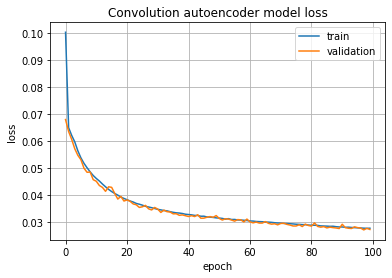

In [52]:
# Loss plots 

plt.plot(q2.history['loss'])
plt.plot(q2.history['val_loss'])
plt.title('Convolution autoencoder model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.grid()
plt.show()

In [0]:
# Randomly choosing 10 test images
np.random.seed(1)
rand_index = np.random.randint(10000, size=10)
final_test_images = test_input[rand_index]


# Getting the intermediate layer output (bottleneck layer encoded)
encoding_model2 = tf.keras.Model(cae.input, cae.get_layer('bottleneck2').output)
final_test_image_encoding2 = encoding_model2.predict(final_test_images)


# Getting the autoencoder output (decoded)
decoded_output2 = cae.predict(final_test_images)

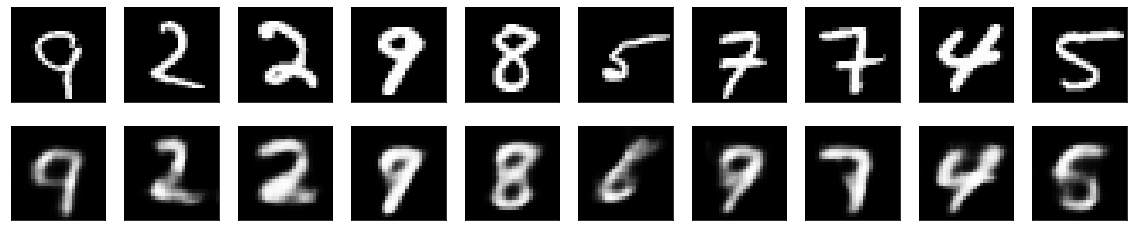

Top row images are original; Bottom row images are the reconstructed ones


In [58]:
# Visualizing the decoded images (Code borrowed from https://blog.keras.io/building-autoencoders-in-keras.html)

n = 10  
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(final_test_images[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_output2[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

print('Top row images are original; Bottom row images are the reconstructed ones')

**Bottleneck of 12 neurons gives the above readable outputs. Increasing the bottleneck easily gives better quality results, but we try to get the best images from the minimal bottleneck**

**Generating images from random input to autoencoder model**

In [0]:
# Preparing a decoding model

# input_shape = model.layers[5].get_input_shape_at(0)
fcae_enc_input = tf.keras.layers.Input(shape=(2,), name='enc_input')
temp = fcae_enc_input
for layer in fcae_model.layers[5:]:
  temp = layer(temp)
fcae_decoder_model = tf.keras.Model(fcae_enc_input, temp)

Random inputs
[ 1.90770723 19.49796981]
[10.96023079 18.08662945]
[24.4497378  13.46239676]
[12.52801159  1.80127833]
[ 6.7109745  12.49706252]
[16.9807499 20.0934759]
[9.52352833 1.64840867]
[ 7.20363998 22.73983819]
[ 5.33463384 11.30309905]
[23.28015049  0.62248069]


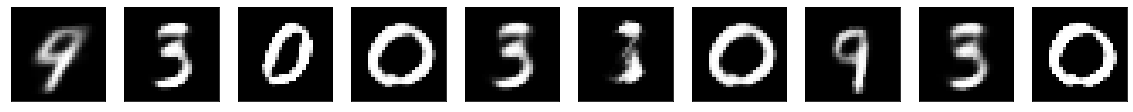

In [77]:
# Visualizing the results

n = 10
plt.figure(figsize=(20, 4))

print('Random inputs')

# generate random encoded input
np.random.seed(7)
random_input = np.random.uniform(high=25, size=(10,2))
# random_input = np.reshape(final_test_image_encoding[i,:], (1, 2))

for i in range(n):

    # get model prediction
    print(random_input[i])
    output = fcae_decoder_model.predict(np.reshape(random_input[i],(1,2)))

    # display reconstruction
    ax = plt.subplot(2, n, i+1)
    plt.imshow(output.reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()

**Standard normal distribution constraint**

In [4]:
# Reshaping the inputs

train_input = np.reshape(x_train, (-1,784))
test_input = np.reshape(x_test, (-1,784))
print(np.shape(train_input),np.shape(test_input))

(60000, 784) (10000, 784)


In [0]:
# Normalizing the inputs

train_input = train_input/255
test_input = test_input/255

In [6]:
# Model

input_layer = tf.keras.layers.Input(shape=(784,), name='input')
encoding_layer0 = tf.keras.layers.Dense(300, activation='relu', name='enc0')(input_layer)
encoding_layer1 = tf.keras.layers.Dense(75, activation='relu', name='enc1')(encoding_layer0)
encoding_layer2 = tf.keras.layers.Dense(15, activation='relu', name='enc2')(encoding_layer1)
bottleneck = tf.keras.layers.Dense(2, activation='relu', name='bottleneck')(encoding_layer2)
bottleneck_norm = tf.keras.layers.BatchNormalization()(bottleneck)
decoding_layer1 = tf.keras.layers.Dense(15, activation='relu', name='dec1')(bottleneck_norm)
decoding_layer2 = tf.keras.layers.Dense(75, activation='relu', name='dec2')(decoding_layer1)
decoding_layer3 = tf.keras.layers.Dense(300, activation='relu', name='dec3')(decoding_layer2)
output_layer = tf.keras.layers.Dense(784, activation='sigmoid', name='output')(decoding_layer3)
normalized_fcae_model = tf.keras.Model(inputs=input_layer, outputs=output_layer)

normalized_fcae_model.compile(loss='mse',optimizer='adam')
print(normalized_fcae_model.summary())

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           [(None, 784)]             0         
_________________________________________________________________
enc0 (Dense)                 (None, 300)               235500    
_________________________________________________________________
enc1 (Dense)                 (None, 75)                22575     
_________________________________________________________________
enc2 (Dense)                 (None, 15)                1140      
_________________________________________________________________
bottleneck (Dense)           (None, 2)                 32        
_________________________________________________________________
batch_normalization (BatchNo (None, 2)                 8         
______________________________________________

In [7]:
q3 = normalized_fcae_model.fit(train_input,train_input,batch_size=500,epochs=100,validation_data=(test_input,test_input))

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 9s 154us/sample - loss: 0.0880 - val_loss: 0.0630
Epoch 2/100
60000/60000 [==============================] - 1s 14us/sample - loss: 0.0560 - val_loss: 0.0580
Epoch 3/100
60000/60000 [==============================] - 1s 14us/sample - loss: 0.0527 - val_loss: 0.0518
Epoch 4/100
60000/60000 [==============================] - 1s 14us/sample - loss: 0.0503 - val_loss: 0.0488
Epoch 5/100
60000/60000 [==============================] - 1s 14us/sample - loss: 0.0483 - val_loss: 0.0476
Epoch 6/100
60000/60000 [==============================] - 1s 14us/sample - loss: 0.0472 - val_loss: 0.0462
Epoch 7/100
60000/60000 [==============================] - 1s 14us/sample - loss: 0.0462 - val_loss: 0.0456
Epoch 8/100
60000/60000 [==============================] - 1s 14us/sample - loss: 0.0456 - val_loss: 0.0452
Epoch 9/100
60000/60000 [==============================] - 1s 14us/sample - loss: 0.0

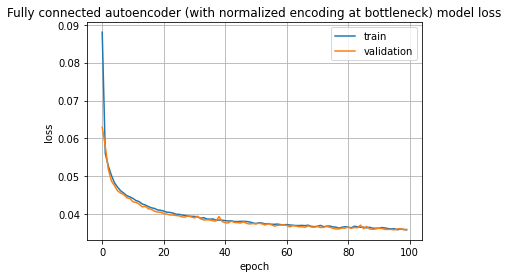

In [8]:
# Loss plots 

from matplotlib import pyplot as plt

plt.plot(q3.history['loss'])
plt.plot(q3.history['val_loss'])
plt.title('Fully connected autoencoder (with normalized encoding at bottleneck) model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.grid()
plt.show()

In [0]:
# Preparing a decoding model

new_fcae_enc_input = tf.keras.layers.Input(shape=(2,), name='enc_input')
temp = new_fcae_enc_input
for layer in normalized_fcae_model.layers[6:]:
  temp = layer(temp)
new_fcae_decoder_model = tf.keras.Model(new_fcae_enc_input, temp)

Multivariate random normal inputs
[ 1.6905257  -0.46593737]
[0.03282016 0.40751628]
[-0.78892303  0.00206557]
[-8.90385858e-04 -1.75472431e+00]
[1.01765801 0.60049852]
[-0.62542897 -0.17154826]
[ 0.50529937 -0.26135642]
[-0.24274908 -1.45324141]
[0.55458031 0.12388091]
[ 0.27445992 -1.52652453]


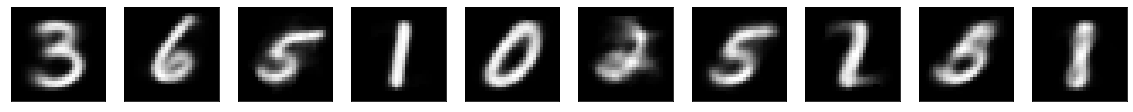

In [11]:
# Visualizing the results

n = 10
plt.figure(figsize=(20, 4))
print('Multivariate random normal inputs')

# generate normalized random encoded input
np.random.seed(7)
mean = np.zeros((2))
var = np.eye(2)
random_input = np.random.multivariate_normal(mean,var, 10)

for i in range(n):

    # get model prediction
    print(random_input[i])
    output = new_fcae_decoder_model.predict(np.reshape(random_input[i], (1,2)))

    # display reconstruction
    ax = plt.subplot(2, n, i+1)
    plt.imshow(output.reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()

The output images from the normalized bottleneck are more clear in the sense that they can be more easily recognized than the images generated from the implementation in the first part. This could be due to the fact that in the first case, the encodings could be any real number (since we are not using any activation regularizer; also due to the fact that we are using ReLU instead of sigmoid activation function). Thus, inputting a random value as an input could not match any of the encodings due to the vast domain of possible encodings. However, in the second case, the encodings are normalized and hence would be clusetered near the mean value of normalization ((0,0) in our case). Hence the randomly generated input could more likely match any of the encodings to produce a recognizable output.

**Variational AutoEncoder**

In [168]:
# Reshaping the inputs

train_input = np.reshape(x_train, (-1,784))
test_input = np.reshape(x_test, (-1,784))
print(np.shape(train_input),np.shape(test_input))

(60000, 784) (10000, 784)


In [0]:
# Normalizing the inputs

train_input = train_input/255
test_input = test_input/255

In [178]:
# Model

input_layer = tf.keras.layers.Input(shape=(784,), name='input')
encoding_layer0 = tf.keras.layers.Dense(300, activation='relu', name='enc0')(input_layer)
encoding_layer1 = tf.keras.layers.Dense(75, activation='relu', name='enc1')(encoding_layer0)
encoding_layer2 = tf.keras.layers.Dense(15, activation='relu', name='enc2')(encoding_layer1)
mu = tf.keras.layers.Dense(2, activation='relu', name='mu')(encoding_layer2)
sigma = tf.keras.layers.Dense(2, activation='relu', name='sigma')(encoding_layer2)

def sampling(args):
    mu, sigma = args
    reparameter = K.random_normal(shape=(2,), mean=0., stddev=1.)
    return mu + (K.exp(sigma))*reparameter

bottleneck = tf.keras.layers.Lambda(sampling, output_shape=(2,))([mu, sigma])

decoding_layer1 = tf.keras.layers.Dense(15, activation='relu', name='dec1')(bottleneck)
decoding_layer2 = tf.keras.layers.Dense(75, activation='relu', name='dec2')(decoding_layer1)
decoding_layer3 = tf.keras.layers.Dense(300, activation='relu', name='dec3')(decoding_layer2)
output_layer = tf.keras.layers.Dense(784, activation='sigmoid', name='output')(decoding_layer3)

vae_model = tf.keras.Model(input_layer, output_layer)
print(vae_model.summary())

Model: "model_77"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input (InputLayer)              [(None, 784)]        0                                            
__________________________________________________________________________________________________
enc0 (Dense)                    (None, 300)          235500      input[0][0]                      
__________________________________________________________________________________________________
enc1 (Dense)                    (None, 75)           22575       enc0[0][0]                       
__________________________________________________________________________________________________
enc2 (Dense)                    (None, 15)           1140        enc1[0][0]                       
___________________________________________________________________________________________

In [0]:
# Preparing the encoder model
encoder_vae = tf.keras.Model(input_layer, mu)

# Preparing a decoding model
decoder_input = tf.keras.layers.Input(shape=(2,))
temp = decoder_input
for layer in vae_model.layers[7:]:
  temp = layer(temp)
vae_decoder_model = tf.keras.Model(decoder_input, temp)

In [0]:
# Defining the vae loss

from keras import backend as K

def vae_loss(x, x_decoded_mean):
    mse_loss = tf.keras.losses.mse(x, x_decoded_mean)
    kl_loss = - 0.5 * K.mean(1 + sigma - K.square(mu) - K.exp(sigma), axis=-1)
    return mse_loss + kl_loss

vae_model.compile(optimizer='adam', loss=vae_loss)

In [181]:
q4 = vae_model.fit(train_input, train_input, epochs=50, batch_size=100, validation_data=(test_input, test_input))

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 6s 106us/sample - loss: 0.0764 - val_loss: 0.0676
Epoch 2/50
60000/60000 [==============================] - 3s 51us/sample - loss: 0.0674 - val_loss: 0.0676
Epoch 3/50
60000/60000 [==============================] - 3s 50us/sample - loss: 0.0674 - val_loss: 0.0676
Epoch 4/50
60000/60000 [==============================] - 3s 51us/sample - loss: 0.0674 - val_loss: 0.0675
Epoch 5/50
60000/60000 [==============================] - 3s 50us/sample - loss: 0.0673 - val_loss: 0.0677
Epoch 6/50
60000/60000 [==============================] - 3s 50us/sample - loss: 0.0673 - val_loss: 0.0675
Epoch 7/50
60000/60000 [==============================] - 3s 50us/sample - loss: 0.0673 - val_loss: 0.0676
Epoch 8/50
60000/60000 [==============================] - 3s 50us/sample - loss: 0.0673 - val_loss: 0.0675
Epoch 9/50
60000/60000 [==============================] - 3s 50us/sample - loss: 0.0673 - val

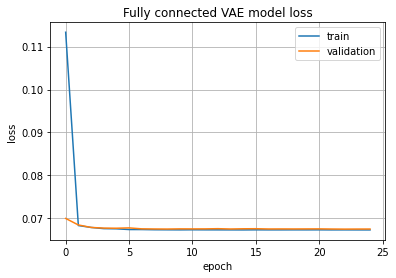

In [163]:
# Loss plots 

from matplotlib import pyplot as plt

plt.plot(q4.history['loss'])
plt.plot(q4.history['val_loss'])
plt.title('Fully connected VAE model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.grid()
plt.show()

Multivariate random normal inputs
[0.85099741 0.17775492]
[-0.85303971 -0.44389968]
[-0.20293796  1.10051557]
[-3.03513615 -0.41456145]
[-1.34308784 -0.7731739 ]
[-1.67520693  0.80527769]
[-0.49491418 -0.50388454]
[-0.59621701  0.37449326]
[ 0.41315697 -0.18360565]
[0.65195623 1.07466944]


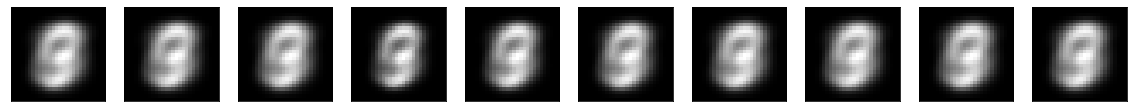

In [183]:
# Visualizing the results

n = 10
plt.figure(figsize=(20, 4))
print('Multivariate random normal inputs')

# generate normalized random encoded input
np.random.seed(70)
mean = np.zeros((2))
var = np.eye(2)
random_input = np.random.multivariate_normal(mean,var, 10)
# random_input = np.random.uniform(high=100, size=(10,2))

for i in range(n):

    # get model prediction
    print(random_input[i])
    output = vae_decoder_model.predict(np.reshape(random_input[i]*1.0, (1,2)))

    # display reconstruction
    ax = plt.subplot(2, n, i+1)
    plt.imshow(output.reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()